## load data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
from scipy.stats import mannwhitneyu
import geopandas as gpd
import numpy as np

In [2]:
datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new'
variable = 'relative_humidity_1p5m'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['relative_humidity']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['relative_humidity']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['relative_humidity']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['relative_humidity']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['relative_humidity']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['relative_humidity']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['relative_humidity']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['relative_humidity']

In [3]:
#clip to land only
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

In [4]:
experiments = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}


## Time series, whole domain

In [7]:
#daily and spatial mean
daily_mean = {}
for name, da in experiments.items():
    daily = da.resample(time="1D").mean(dim="time", skipna=True)
    daily_mean[name] = daily.mean(dim=["latitude","longitude"], skipna=True)

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _va

In [8]:
#diff from ref
ref_name = "Control"
ref = daily_mean[ref_name]

diff = {}
for name, da in daily_mean.items():
    if name != ref_name:
        diff[name] = da - ref

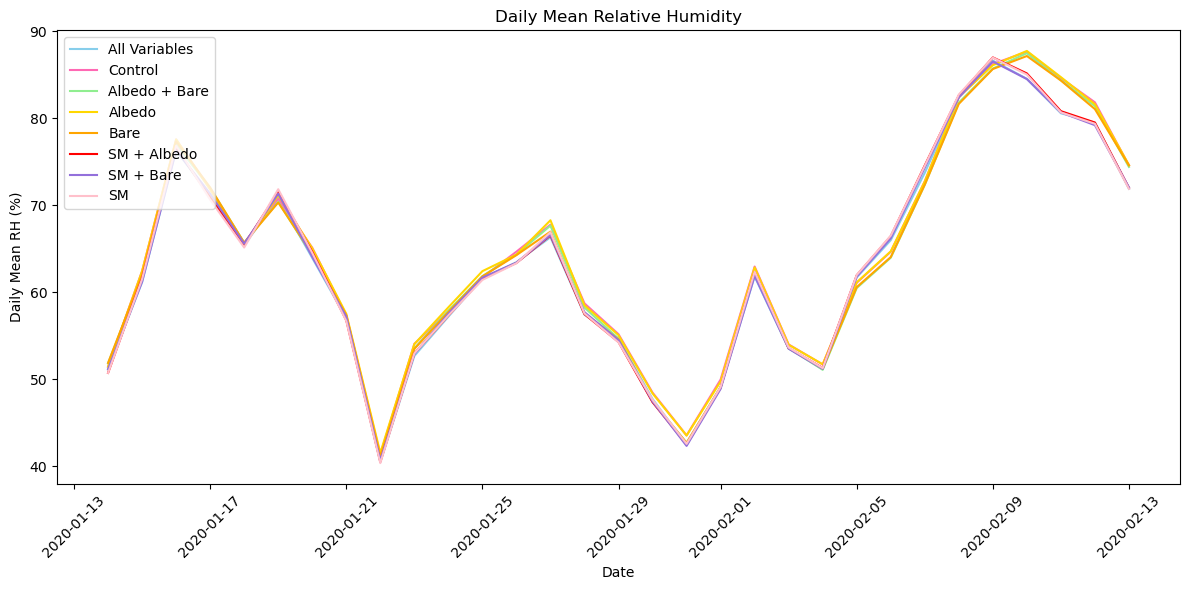

In [21]:
colors = ["skyblue", "hotpink", "lightgreen", "gold", "orange", "red", "mediumpurple", "pink"]

plt.figure(figsize=(12,6))
for i, (name, da) in enumerate(daily_mean.items()):
    plt.plot(da.time, da, label=name, color=colors[i % len(colors)])

plt.ylabel("Daily Mean RH (%)")
plt.xlabel("Date")
plt.title("Daily Mean Relative Humidity")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

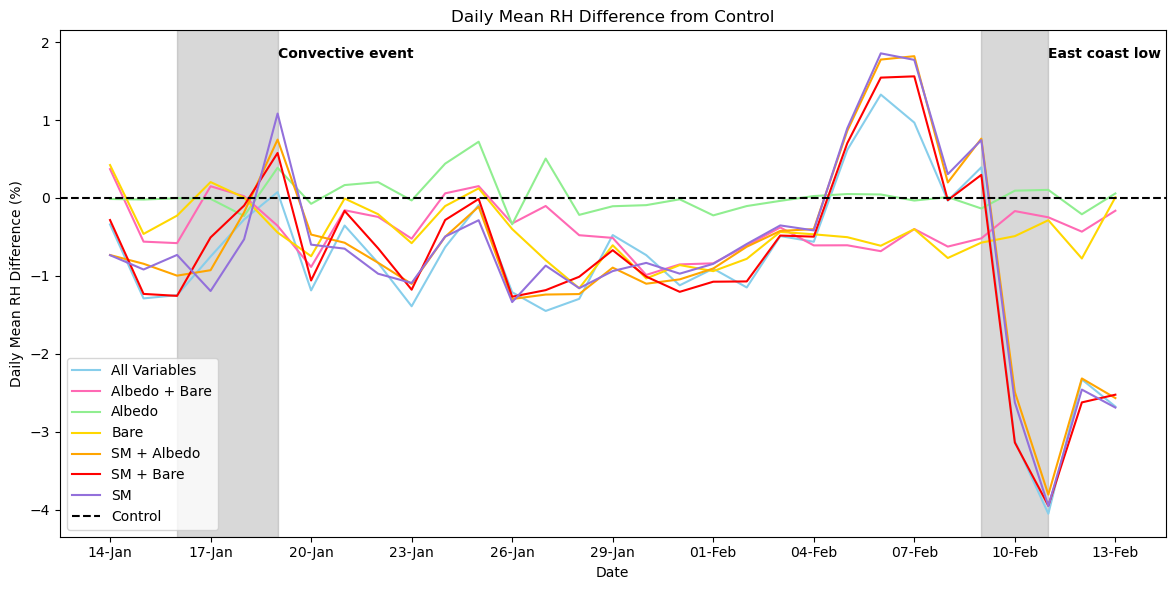

Mann-Whitney U test vs Control (p < 0.05 = significant):
All Variables vs Control: p = 7.783e-01 → Not significant
Albedo + Bare vs Control: p = 8.218e-01 → Not significant
Albedo vs Control: p = 9.775e-01 → Not significant
Bare vs Control: p = 8.108e-01 → Not significant
SM + Albedo vs Control: p = 8.108e-01 → Not significant
SM + Bare vs Control: p = 7.891e-01 → Not significant
SM vs Control: p = 7.999e-01 → Not significant


In [10]:
#diff from control
colors = ["skyblue", "hotpink", "lightgreen", "gold", "orange", "red", "mediumpurple", "pink"]
ref_name = "Control"

plt.figure(figsize=(12,6))

for i, (name, da) in enumerate(diff.items()):
    plt.plot(da.time, da, label=name, color=colors[i % len(colors)])

#highlight relevant periods
#ECL
start_highlight1 = pd.to_datetime("2020-02-09")  
end_highlight1   = pd.to_datetime("2020-02-11")
plt.axvspan(start_highlight1, end_highlight1, color="grey", alpha=0.3)
plt.text(end_highlight1, plt.ylim()[1]*0.9, "East coast low",
         rotation=0, va="top", ha="left", fontsize=10, color="black", weight='demi')
#convective
start_highlight2 = pd.to_datetime("2020-01-16") 
end_highlight2   = pd.to_datetime("2020-01-19")
plt.axvspan(start_highlight2, end_highlight2, color="grey", alpha=0.3)
plt.text(end_highlight2, plt.ylim()[1]*0.9, "Convective event",
         rotation=0, va="top", ha="left", fontsize=10, color="black", weight='demi')

dates = pd.to_datetime(daily.time.values)
plt.xticks(ticks=daily.time.values[::max(1, len(dates)//10)],
           labels=[d.strftime("%d-%b") for d in dates[::max(1, len(dates)//10)]],
           rotation=45)

plt.axhline(0, color='k', linestyle='--')
control_handle = mlines.Line2D([], [], color='k', linestyle='--', label="Control")
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [control_handle], loc="lower left")

plt.ylabel("Daily Mean RH Difference (%)")
plt.xlabel("Date")
plt.title(f"Daily Mean RH Difference from {ref_name}")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Mann-Whitney U test vs Control (p < 0.05 = significant):")
for name, vals in daily_mean.items():
    if name != ref_name:
        stat, p = mannwhitneyu(daily_mean[ref_name], vals)
        sig_text = "Significant" if p < 0.05 else "Not significant"
        print(f"{name} vs {ref_name}: p = {p:.3e} → {sig_text}")


## Time series, fire scars

In [11]:
fires = gpd.read_file('/g/data/ng72/as9583/merged_fires.gpkg')
variable2 = 'surface_altitude'
sa1 = xr.open_dataset(f'{datapath}/{variable2}/{experiment1}{variable2}.nc')[variable2].isel(time=0)

In [12]:
#clip to fire scar
fires = fires.to_crs("EPSG:7844")

clipped = {}

for name, da in experiments.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da


In [13]:
allvar = clipped['All Variables']
control =clipped['Control']
albedo_bare =clipped['Albedo + Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM + Albedo']
SM_bare=clipped['SM + Bare']
SM =clipped['SM']

In [14]:
#fire scar experiments
experiments1 = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [15]:
#daily mean
daily_mean1 = {}
for name, da in experiments1.items():
    daily_mean1[name] = da.resample(time="1D").mean()

#flatten
daily_mean_flat1 = {}
for name, da in daily_mean1.items():
    vals1 = da.values.flatten()
    #remove Nan
    daily_mean_flat1[name] = vals1[~np.isnan(vals1)]

#diff from ref
ref_name1 = "Control"
ref1 = daily_mean[ref_name]

diff1 = {}
for name, da in daily_mean1.items():
    if name != ref_name1:
        diff1[name] = da - ref1

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _va

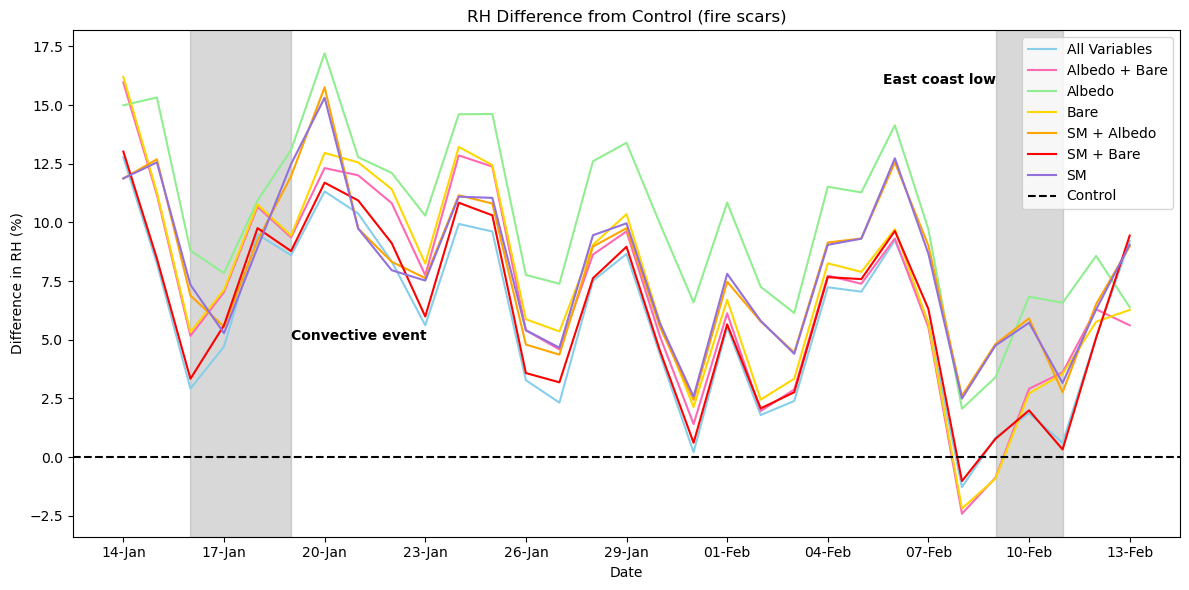

Mann-Whitney U test vs Control (p < 0.05 = significant):
All Variables vs Control: p = 0.000e+00 → Significant
Albedo + Bare vs Control: p = 0.000e+00 → Significant
Albedo vs Control: p = 4.610e-01 → Not significant
Bare vs Control: p = 0.000e+00 → Significant
SM + Albedo vs Control: p = 0.000e+00 → Significant
SM + Bare vs Control: p = 0.000e+00 → Significant
SM vs Control: p = 0.000e+00 → Significant


In [24]:
ref_name1 = "Control"
colors = ["skyblue", "hotpink", "lightgreen", "gold", "orange", "red", "mediumpurple", "pink"]

plt.figure(figsize=(12,6))

for i, (name, da) in enumerate(diff1.items()):
    #daily spatial mean
    time_series = da.mean(dim=["latitude","longitude"], skipna=True)
    plt.plot(time_series.time, time_series, label=name, color=colors[i % len(colors)])

#highlight
#ECL
start_highlight1 = pd.to_datetime("2020-02-09")  
end_highlight1   = pd.to_datetime("2020-02-11")
plt.axvspan(start_highlight1, end_highlight1, color="grey", alpha=0.3)
plt.text(start_highlight1, plt.ylim()[1]*0.9, "East coast low", 
         rotation=0, va="top", ha="right", fontsize=10, color="black", weight='demi')
#convective
start_highlight2 = pd.to_datetime("2020-01-16") 
end_highlight2   = pd.to_datetime("2020-01-19")
plt.axvspan(start_highlight2, end_highlight2, color="grey", alpha=0.3)
plt.text(end_highlight2, plt.ylim()[1]*0.3, "Convective event",
         rotation=0, va="top", ha="left", fontsize=10, color="black", weight='demi')

#custom control proxy line
plt.axhline(0, color='k', linestyle='--')
plt.ylabel("Difference in RH (%)")
plt.xlabel("Date")
plt.title(f"RH Difference from {ref_name} (fire scars)")
plt.legend()

dates = pd.to_datetime(time_series.time.values)
plt.xticks(ticks=time_series.time.values[::max(1, len(dates)//10)],
           labels=[d.strftime("%d-%b") for d in dates[::max(1, len(dates)//10)]],
           rotation=0)
control_handle = mlines.Line2D([], [], color='k', linestyle='--', label="Control")

plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], control_handle], loc = 'upper right')
plt.tight_layout()
plt.show()

print("Mann-Whitney U test vs Control (p < 0.05 = significant):")
for name, vals in daily_mean_flat1.items():
    if name != ref_name:
        stat, p = mannwhitneyu(daily_mean_flat1[ref_name], vals)
        sig_text = "Significant" if p < 0.05 else "Not significant"
        print(f"{name} vs {ref_name}: p = {p:.3e} → {sig_text}")

## whole domain, diurnal

In [17]:
#spatial mean
rh_series = {}
for name, da in experiments.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    rh_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

In [18]:
#diurnal 
rh_diurnal = {}
for name, series in rh_series.items():
    rh_diurnal[name] = series.groupby("time.hour").mean("time")

ref = rh_diurnal["Control"]

rh_diff = {}
for name, series in rh_diurnal.items():
    if name != "Control":
        series, ref_aligned = xr.align(series, ref)
        rh_diff[name] = series - ref_aligned


INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

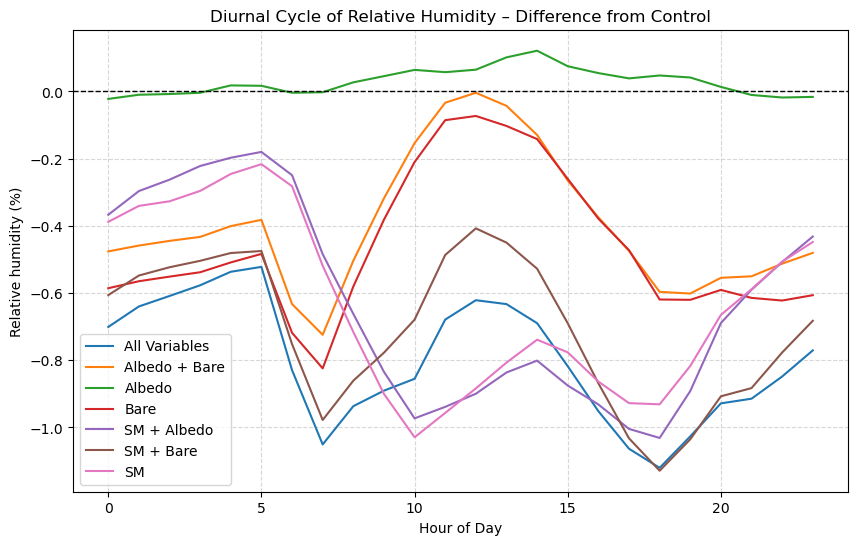

In [19]:
plt.figure(figsize=(10,6))

for name, diff in rh_diff.items():
    plt.plot(diff["hour"], diff.values, label=f"{name}")

plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.title("Diurnal Cycle of Relative Humidity – Difference from Control")
plt.xlabel("Hour of Day")
plt.ylabel("Relative humidity (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## fire scar, diurnal

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

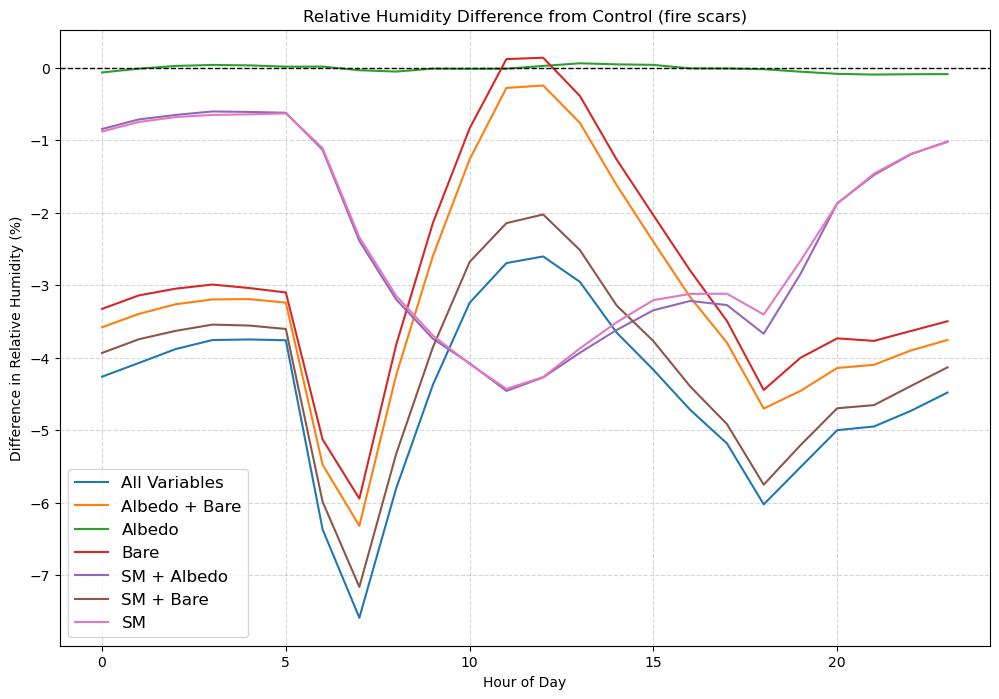

In [20]:
rh_series = {}
for name, da in experiments1.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    rh_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

rh_diurnal = {}
for name, series in rh_series.items():
    rh_diurnal[name] = series.groupby("time.hour").mean("time")

ref = rh_diurnal["Control"]

rh_diff = {}
for name, series in rh_diurnal.items():
    if name != "Control":
        series, ref_aligned = xr.align(series, ref)
        rh_diff[name] = series - ref_aligned

plt.figure(figsize=(12,8))

for name, diff in rh_diff.items():
    plt.plot(diff["hour"], diff.values, label=f"{name}")

plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.title("Relative Humidity Difference from Control (fire scars)")
plt.xlabel("Hour of Day")
plt.ylabel("Difference in Relative Humidity (%)")
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
# plt.savefig("/g/data/ng72/as9583/figures/RH_firescars.png", dpi=300, bbox_inches="tight")
plt.show()